/tmp/ipython-input-322794841.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed



Linear Regression Performance:
MSE: 6.024661651359546
R² Score: 0.9841739881061085

Random Forest Performance:
MSE: 71.91818453167302
R² Score: 0.811080171858531


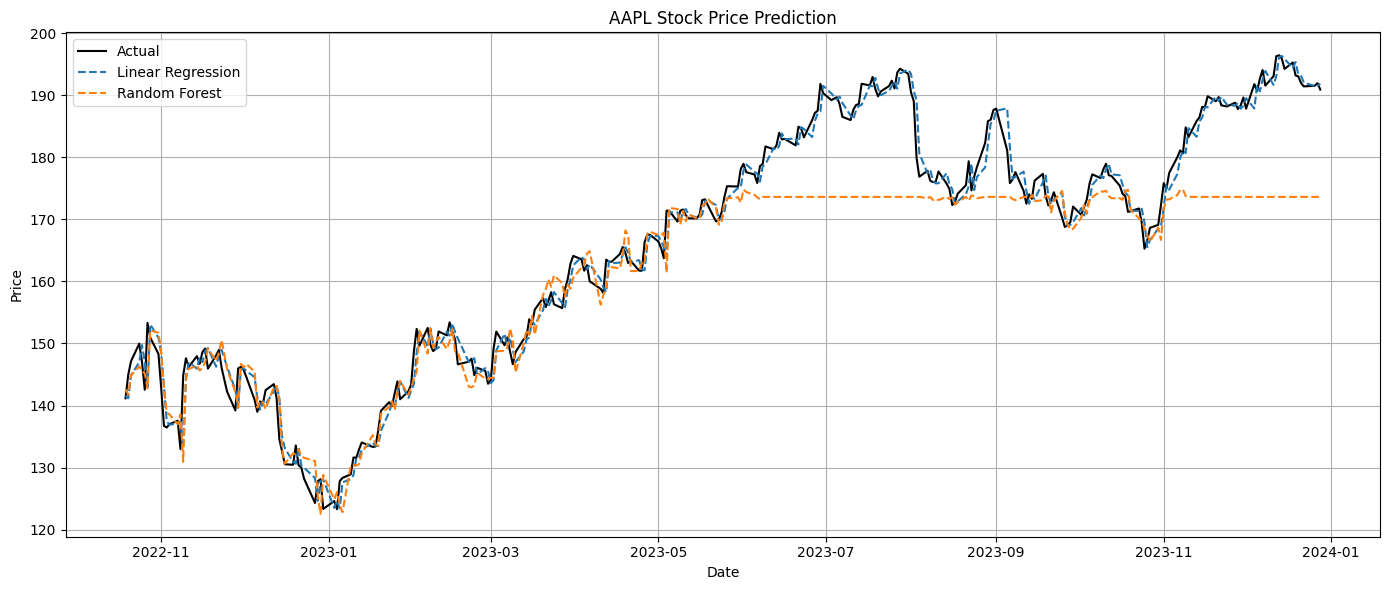

In [2]:

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# --- 1. Download historical data ---
ticker = 'AAPL'  # You can change this to any stock, e.g., 'GOOG', 'MSFT'
data = yf.download(ticker, start='2018-01-01', end='2023-12-31')
data = data[['Close']]

# --- 2. Create features and labels ---
data['Target'] = data['Close'].shift(-1)  # Predict next day's closing price
data.dropna(inplace=True)

# You can also add more features like Moving Averages, RSI, MACD etc. to improve performance
data['SMA_5'] = data['Close'].rolling(window=5).mean()
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data.dropna(inplace=True)

# --- 3. Prepare the dataset ---
features = ['Close', 'SMA_5', 'SMA_10']
X = data[features]
y = data['Target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# --- 4. Train models ---
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# --- 5. Evaluation ---
def evaluate(model_name, y_true, y_pred):
    print(f"\n{model_name} Performance:")
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R² Score:", r2_score(y_true, y_pred))

evaluate("Linear Regression", y_test, lr_preds)
evaluate("Random Forest", y_test, rf_preds)

# --- 6. Plot results ---
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual', color='black')
plt.plot(y_test.index, lr_preds, label='Linear Regression', linestyle='--')
plt.plot(y_test.index, rf_preds, label='Random Forest', linestyle='--')
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
